In [1]:
#importando as bibliotecas
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
variavel = input("Processar arquivo?")

if variavel == 'S':

    try:
        nome_arquivo = 'C:/Users/maaf2/Downloads/COTAHIST_A2021/COTAHIST_A2021.csv'
        arquivo = open(nome_arquivo, 'r+')
    except FileNotFoundError:
        arquivo = open(nome_arquivo, 'w+')



    arq = open("C:/Users/maaf2/Downloads/COTAHIST_A2021/COTAHIST_A2021.TXT")
    linhas = arq.readlines()
    arquivo.writelines('DATA DO PREGAO;CODNEG;preco_abertura;preco_max;preco_minimo;preco_fechamento;qtd_negocios;volume_negocios\n')
    for linha in linhas:
        if linha[0:2] == '01':
            linha_temp = ''
            linha_temp = linha[2:6]+'-'+linha[6:8]+'-'+linha[8:10]+';' #Data
            linha_temp = linha_temp+linha[12:24].strip()+';'           #Ação
            precoAbertura = int(linha[56:69])/100                            
            linha_temp = linha_temp+str(precoAbertura)+';'                    #Preço Abertura
            precoMaximo = int(linha[69:82])/100                            
            linha_temp = linha_temp+str(precoMaximo)+';'                    #Preço Maximo
            precoMinimo = int(linha[82:95])/100                            
            linha_temp = linha_temp+str(precoMinimo)+';'                    #Preço Minimo
            precoFechamento = int(linha[108:121])/100                            
            linha_temp = linha_temp+str(precoFechamento)+';'                    #Preço Fechamento
            linha_temp = linha_temp+linha[152:170]+';'           #Qtde de Negócio
            linha_temp = linha_temp+linha[170:188]+'\n'           #Volume de negócios
            arquivo.writelines(linha_temp)


    #linhas = arquivo.readlines()
    #for linha in linhas:
    #    print(linha)

    #faca o que quiser
    arquivo.close()
    arq.close()

Processar arquivo?N


In [3]:
df = pd.read_csv("C:\\Users\\maaf2\\Downloads\\COTAHIST_A2021\\COTAHIST_A2021.csv", delimiter=';')
df

,DATA DO PREGAO,CODNEG,preco_abertura,preco_max,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios
0,2021-01-04,A1AP34,51.10,52.03,50.62,51.90,6425,33355875
1,2021-01-04,A1BB34,36.80,37.32,36.74,37.18,58,214677
2,2021-01-04,A1BM34,409.42,416.60,409.42,415.30,326,13537963
3,2021-01-04,A1CR34,58.50,60.10,58.50,59.77,1103,6592556
4,2021-01-04,A1EE34,199.60,199.60,199.60,199.60,400,7984000
...,...,...,...,...,...,...,...,...
1067296,2021-08-10,YDUQU250,0.42,0.52,0.42,0.52,1500,73000
1067297,2021-08-10,YDUQU255,0.55,0.55,0.54,0.54,2900,158500
1067298,2021-08-10,YDUQU260,0.59,0.85,0.59,0.85,2000,131000
1067299,2021-08-10,YDUQU272,1.18,1.20,1.18,1.20,400,47800


In [4]:
#Itau
sigla = 'PETR4'
df_itau = df[df['CODNEG'] == sigla ]
df_itau.tail(10)

,DATA DO PREGAO,CODNEG,preco_abertura,preco_max,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios
215285,2021-07-28,PETR4,27.43,27.90,27.20,27.71,46727100,128927883500
216848,2021-07-29,PETR4,27.80,27.92,27.50,27.81,43916600,121958198300
218436,2021-07-30,PETR4,27.60,27.83,26.83,26.91,74150400,202067247800
220026,2021-08-02,PETR4,27.20,27.41,26.37,26.41,70528800,189483495400
221667,2021-08-03,PETR4,26.36,26.87,25.79,26.85,71850400,189848149900
223294,2021-08-04,PETR4,26.55,26.77,25.95,26.28,87970600,231219444300
224911,2021-08-05,PETR4,28.75,28.98,28.06,28.35,223915900,639606567400
226491,2021-08-06,PETR4,28.50,28.54,28.02,28.39,51106100,144712490900
228068,2021-08-09,PETR4,27.95,28.21,27.67,28.19,75381900,211245515400
229652,2021-08-10,PETR4,28.30,28.78,28.24,28.28,84380900,240694071000


In [5]:
#verificar o tipo do arquivo
df_itau.dtypes

DATA DO PREGAO       object
CODNEG               object
preco_abertura      float64
preco_max           float64
preco_minimo        float64
preco_fechamento    float64
qtd_negocios          int64
volume_negocios       int64
dtype: object

In [6]:
df_itau['DATA DO PREGAO'] = pd.to_datetime(df_itau['DATA DO PREGAO'], format='%Y-%m-%d')

C:\Users\maaf2\AppData\Local\Temp/ipykernel_16300/305507388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_itau['DATA DO PREGAO'] = pd.to_datetime(df_itau['DATA DO PREGAO'], format='%Y-%m-%d')


In [7]:
df_itau.dtypes

DATA DO PREGAO      datetime64[ns]
CODNEG                      object
preco_abertura             float64
preco_max                  float64
preco_minimo               float64
preco_fechamento           float64
qtd_negocios                 int64
volume_negocios              int64
dtype: object

In [8]:
df_itau.tail(10)

,DATA DO PREGAO,CODNEG,preco_abertura,preco_max,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios
215285,2021-07-28,PETR4,27.43,27.90,27.20,27.71,46727100,128927883500
216848,2021-07-29,PETR4,27.80,27.92,27.50,27.81,43916600,121958198300
218436,2021-07-30,PETR4,27.60,27.83,26.83,26.91,74150400,202067247800
220026,2021-08-02,PETR4,27.20,27.41,26.37,26.41,70528800,189483495400
221667,2021-08-03,PETR4,26.36,26.87,25.79,26.85,71850400,189848149900
223294,2021-08-04,PETR4,26.55,26.77,25.95,26.28,87970600,231219444300
224911,2021-08-05,PETR4,28.75,28.98,28.06,28.35,223915900,639606567400
226491,2021-08-06,PETR4,28.50,28.54,28.02,28.39,51106100,144712490900
228068,2021-08-09,PETR4,27.95,28.21,27.67,28.19,75381900,211245515400
229652,2021-08-10,PETR4,28.30,28.78,28.24,28.28,84380900,240694071000


In [9]:
#criando novos campos de medias móveis
df_itau['mm5d'] = df_itau['preco_fechamento'].rolling(5).mean()
df_itau['mm21d'] = df_itau['preco_fechamento'].rolling(21).mean()

C:\Users\maaf2\AppData\Local\Temp/ipykernel_16300/896649810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_itau['mm5d'] = df_itau['preco_fechamento'].rolling(5).mean()
C:\Users\maaf2\AppData\Local\Temp/ipykernel_16300/896649810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_itau['mm21d'] = df_itau['preco_fechamento'].rolling(21).mean()


In [10]:
df_itau.head(22)

,DATA DO PREGAO,CODNEG,preco_abertura,preco_max,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios,mm5d,mm21d
703,2021-01-04,PETR4,28.65,29.18,28.53,28.91,74719700,215376875800,NaN,NaN
2230,2021-01-05,PETR4,28.90,30.18,28.24,30.04,95181100,279481424800,NaN,NaN
3906,2021-01-06,PETR4,30.16,30.90,30.05,30.07,96562500,294710158800,NaN,NaN
5465,2021-01-07,PETR4,30.34,31.15,30.34,31.00,56171300,173039717900,NaN,NaN
6943,2021-01-08,PETR4,31.46,31.76,30.35,31.12,67136300,208499975800,30.228,NaN
8554,2021-01-11,PETR4,30.61,31.06,30.40,30.86,48744700,149891223500,30.618,NaN
10115,2021-01-12,PETR4,31.12,31.56,30.63,30.63,65691900,203732299900,30.736,NaN
11618,2021-01-13,PETR4,30.68,30.86,29.00,29.15,93826600,277811788200,30.552,NaN
13098,2021-01-14,PETR4,29.17,29.67,28.72,29.45,50745400,148521320000,30.242,NaN
14529,2021-01-15,PETR4,29.05,29.08,28.03,28.12,80673300,228735096100,29.642,NaN


In [11]:
#Empurrando para frente os valores das ações
df_itau['preco_fechamento'] = df_itau['preco_fechamento'].shift(-1)
df_itau.tail(10)

C:\Users\maaf2\AppData\Local\Temp/ipykernel_16300/4202814187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_itau['preco_fechamento'] = df_itau['preco_fechamento'].shift(-1)


,DATA DO PREGAO,CODNEG,preco_abertura,preco_max,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios,mm5d,mm21d
215285,2021-07-28,PETR4,27.43,27.90,27.20,27.81,46727100,128927883500,27.194,27.701429
216848,2021-07-29,PETR4,27.80,27.92,27.50,26.91,43916600,121958198300,27.376,27.636190
218436,2021-07-30,PETR4,27.60,27.83,26.83,26.41,74150400,202067247800,27.410,27.516190
220026,2021-08-02,PETR4,27.20,27.41,26.37,26.85,70528800,189483495400,27.198,27.390000
221667,2021-08-03,PETR4,26.36,26.87,25.79,26.28,71850400,189848149900,27.138,27.279048
223294,2021-08-04,PETR4,26.55,26.77,25.95,28.35,87970600,231219444300,26.852,27.156667
224911,2021-08-05,PETR4,28.75,28.98,28.06,28.39,223915900,639606567400,26.960,27.189048
226491,2021-08-06,PETR4,28.50,28.54,28.02,28.19,51106100,144712490900,27.256,27.205238
228068,2021-08-09,PETR4,27.95,28.21,27.67,28.28,75381900,211245515400,27.612,27.238571
229652,2021-08-10,PETR4,28.30,28.78,28.24,NaN,84380900,240694071000,27.898,27.264762


In [12]:
#retirando os dados nulos
df_itau.dropna(inplace=True)
df_itau.tail()

c:\users\maaf2\appdata\local\programs\python\python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,DATA DO PREGAO,CODNEG,preco_abertura,preco_max,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios,mm5d,mm21d
221667,2021-08-03,PETR4,26.36,26.87,25.79,26.28,71850400,189848149900,27.138,27.279048
223294,2021-08-04,PETR4,26.55,26.77,25.95,28.35,87970600,231219444300,26.852,27.156667
224911,2021-08-05,PETR4,28.75,28.98,28.06,28.39,223915900,639606567400,26.960,27.189048
226491,2021-08-06,PETR4,28.50,28.54,28.02,28.19,51106100,144712490900,27.256,27.205238
228068,2021-08-09,PETR4,27.95,28.21,27.67,28.28,75381900,211245515400,27.612,27.238571


In [13]:
#reindexando o data frame
df_itau = df_itau.reset_index(drop=True)
df_itau.tail()

,DATA DO PREGAO,CODNEG,preco_abertura,preco_max,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios,mm5d,mm21d
124,2021-08-03,PETR4,26.36,26.87,25.79,26.28,71850400,189848149900,27.138,27.279048
125,2021-08-04,PETR4,26.55,26.77,25.95,28.35,87970600,231219444300,26.852,27.156667
126,2021-08-05,PETR4,28.75,28.98,28.06,28.39,223915900,639606567400,26.960,27.189048
127,2021-08-06,PETR4,28.50,28.54,28.02,28.19,51106100,144712490900,27.256,27.205238
128,2021-08-09,PETR4,27.95,28.21,27.67,28.28,75381900,211245515400,27.612,27.238571


In [14]:
#verificando quantidade de linhas
qtd_linhas = len(df_itau)

qtd_linhas_treino= round(.70 * qtd_linhas)
qtd_linhas_teste= qtd_linhas - qtd_linhas_treino  
qtd_linhas_validacao = qtd_linhas -1

info = (
    f"linhas treino= 0:{qtd_linhas_treino}"
    f" linhas teste= {qtd_linhas_treino}:{qtd_linhas_treino + qtd_linhas_teste -1}"
    f" linhas validação= {qtd_linhas_validacao}"
)

info

'linhas treino= 0:90 linhas teste= 90:128 linhas validação= 128'

In [15]:
#separando as features e labels
features = df_itau.drop(['CODNEG', 'DATA DO PREGAO', 'preco_fechamento'], 1)
labels = df_itau['preco_fechamento']

C:\Users\maaf2\AppData\Local\Temp/ipykernel_16300/403374554.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features = df_itau.drop(['CODNEG', 'DATA DO PREGAO', 'preco_fechamento'], 1)


In [16]:
#Escolhendo as melhores features com Kbest

features_list = ('preco_abertura','preco_max','preco_minimo','qtd_negocios','volume_negocios','mm5d','mm21d')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print ('')
print ("Melhores features:")
print (k_best_features_final)
print (best_features)


Melhores features:
{'qtd_negocios': 29.974601336719207, 'preco_minimo': 22.96876454020708, 'preco_max': 18.002218757774266, 'volume_negocios': 13.66517080211139, 'mm21d': 10.598479344802401, 'mm5d': 10.083692801062158}
dict_keys(['qtd_negocios', 'preco_minimo', 'preco_max', 'volume_negocios', 'mm21d', 'mm5d'])


In [17]:
#separando as features escolhidas
#features = df_itau.loc[:,['preco_minimo','mm21d','qtd_negocios','preco_max','mm5d','volume_negocios']]
features = df_itau.loc[:,best_features]

In [18]:
features

,qtd_negocios,preco_minimo,preco_max,volume_negocios,mm21d,mm5d
0,91663000,28.20,29.14,262912126500,28.760952,27.604
1,47486800,28.66,29.14,137111398900,28.758095,27.898
2,41444100,28.21,28.99,118618584000,28.700000,28.110
3,121098700,28.32,30.09,355466392600,28.650000,28.576
4,98821700,27.80,29.30,280470742900,28.512381,28.692
...,...,...,...,...,...,...
124,71850400,25.79,26.87,189848149900,27.279048,27.138
125,87970600,25.95,26.77,231219444300,27.156667,26.852
126,223915900,28.06,28.98,639606567400,27.189048,26.960
127,51106100,28.02,28.54,144712490900,27.205238,27.256


In [19]:
#Separa os dados de treino teste e validação
X_train = features[:qtd_linhas_treino]
X_test = features[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste -1]

y_train = labels[:qtd_linhas_treino]
y_test = labels[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste -1]

print( len(X_train), len(y_train))

print( len(X_test), len(y_test))

90 90
38 38


In [20]:
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)
print ('Features: ', features_scale.shape)
print (features_scale)

Features:  (129, 6)
[[0.12776469 0.88329519 0.80287929 0.18348532 0.97611342 0.77874473]
 [0.03108834 0.93592677 0.80287929 0.05783013 0.9756511  0.81751055]
 [0.01786434 0.88443936 0.786268   0.03935871 0.96625058 0.84546414]
 [0.19218255 0.89702517 0.90808416 0.2759325  0.95815996 0.90690928]
 [0.14343098 0.8375286  0.82059801 0.20102362 0.93589151 0.92220464]
 [0.06648701 0.78947368 0.71760797 0.09717835 0.90830636 0.89266878]
 [0.04304393 0.7597254  0.68106312 0.06683478 0.884728   0.8649789 ]
 [0.06100807 0.84553776 0.73200443 0.09335318 0.86507937 0.84546414]
 [0.03177617 0.81578947 0.73089701 0.05548273 0.85960857 0.83016878]
 [0.04747221 0.87528604 0.8538206  0.07999929 0.86068732 0.86919831]
 [0.15813173 0.97940503 1.         0.23563505 0.86954847 0.91482068]
 [0.3995055  0.76544622 0.73089701 0.51816777 0.86384651 0.90242616]
 [1.         0.10526316 0.14507198 1.         0.80805979 0.72758439]
 [0.56947684 0.25514874 0.26245847 0.60910307 0.7760826  0.61207806]
 [0.26691227 0

In [21]:
#Separa os dados de treino teste e validação
X_train = features[:qtd_linhas_treino]
X_test = features[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste -1]

y_train = labels[:qtd_linhas_treino]
y_test = labels[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste -1]

print( len(X_train), len(y_train))

print( len(X_test), len(y_test))

90 90
38 38


In [22]:

# Normalizando os dados de entrada(features)

# Gerando o novo padrão
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)  # Normalizando os dados de entrada(treinamento)
X_test_scale  = scaler.transform(X_test)       # Normalizando os dados de entrada(teste)

In [23]:
#treinamento usando regressão linear
lr = linear_model.LinearRegression()
lr.fit(X_train_scale, y_train)
pred= lr.predict(X_test_scale)
cd =r2_score(y_test, pred)

f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:8.93'

In [24]:
#rede neural
rn = MLPRegressor(max_iter=2000)

rn.fit(X_train_scale, y_train)
pred= rn.predict(X_test_scale)

cd = rn.score(X_test_scale, y_test)


f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:58.64'

In [25]:
##rede neural com ajuste hyper parameters

#rn = MLPRegressor()

#parameter_space = {
#        'hidden_layer_sizes': [(i,) for i in list(range(1, 21))],
#        'activation': ['tanh', 'relu'],
#        'solver': ['sgd', 'adam', 'lbfgs'], 
#        'alpha': [0.0001, 0.05],
 #       'learning_rate': ['constant', 'adaptive'],
#    }

#search = GridSearchCV(rn, parameter_space, n_jobs=-1, cv=5)


#search.fit(X_train_scale,y_train)
#clf = search.best_estimator_
#pred= search.predict(X_test_scale)

#cd = search.score(X_test_scale, y_test)

#f'Coeficiente de determinação:{cd * 100:.2f}'

In [26]:
valor_novo = features.tail(1)
valor_novo

,qtd_negocios,preco_minimo,preco_max,volume_negocios,mm21d,mm5d
128,75381900,27.67,28.21,211245515400,27.238571,27.612


In [27]:
df = df[df['CODNEG'] == sigla ]

#executando a previsão

previsao=scaler.transform(valor_novo)
pred=lr.predict(previsao)
pred

data_pregao_full=df['DATA DO PREGAO']
data_pregao=data_pregao_full.tail(1)

res_full=df['preco_fechamento']
res=res_full.tail(1)

df=pd.DataFrame({'DATA DO PREGAO':data_pregao, 'real':res, 'previsao':pred})


df.set_index('DATA DO PREGAO', inplace=True)

print(df)


                 real   previsao
DATA DO PREGAO                  
2021-08-10      28.28  27.760909


In [28]:
previsao=features_scale[qtd_linhas_teste:qtd_linhas]

data_pregao_full=df_itau['DATA DO PREGAO']
data_pregao=data_pregao_full[qtd_linhas_teste:qtd_linhas]

res_full=df_itau['preco_fechamento']
res=res_full[qtd_linhas_teste:qtd_linhas]

pred=lr.predict(previsao)

df=pd.DataFrame({'data_pregao':data_pregao, 'real':res, 'previsao':pred})
df['real'] = df['real'].shift(+1)

df.set_index('data_pregao', inplace=True)

print(df.tail(10))



              real   previsao
data_pregao                  
2021-07-27   27.15  27.168023
2021-07-28   27.71  27.704005
2021-07-29   27.81  28.025321
2021-07-30   26.91  26.916780
2021-08-02   26.41  26.479456
2021-08-03   26.85  25.788606
2021-08-04   26.28  25.792435
2021-08-05   28.35  24.766766
2021-08-06   28.39  28.650636
2021-08-09   28.19  27.665161


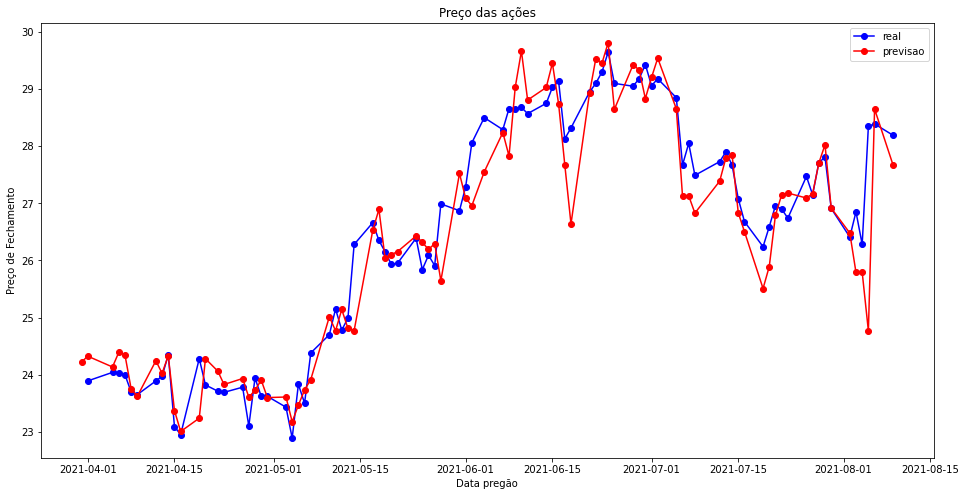

In [29]:
plt.figure(figsize=(16,8))
plt.title('Preço das ações')
plt.plot(df['real'],label="real",color='blue',marker='o')
plt.plot(df['previsao'],label="previsao",color='red',marker='o')
plt.xlabel('Data pregão')
plt.ylabel('Preço de Fechamento')
leg = plt.legend()